## Step 1: Reading and Understanding the Data

In [1]:
#data analysis libraries 

import numpy as np
import pandas as pd


# visualization libraries

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
#import train and test CSV files


train = pd.read_csv("C:/Users/hp/Desktop/titanic/train.csv")
test = pd.read_csv("C:/Users/hp/Desktop/titanic/test.csv")

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
sum(train.duplicated(subset = 'PassengerId')) == 0
sum(test.duplicated(subset = 'PassengerId')) == 0

True

In [7]:
print (train.isnull().values.any())
print (test.isnull().values.any())

True
True


In [8]:
test.shape

(418, 11)

In [9]:
train.shape

(891, 12)

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [12]:
train.describe(include="all")


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Brown, Mrs. Thomas William Solomon (Elizabeth ...",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [13]:
#a list of the features within the dataset

print(train.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [14]:
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
612,613,1,3,"Murphy, Miss. Margaret Jane",female,NaN,1,0,367230,15.5000,NaN,Q
388,389,0,3,"Sadlier, Mr. Matthew",male,NaN,0,0,367655,7.7292,NaN,Q
232,233,0,2,"Sjostedt, Mr. Ernst Adolf",male,59.0,0,0,237442,13.5000,NaN,S
115,116,0,3,"Pekoniemi, Mr. Edvard",male,21.0,0,0,STON/O 2. 3101294,7.9250,NaN,S
289,290,1,3,"Connolly, Miss. Kate",female,22.0,0,0,370373,7.7500,NaN,Q


Numerical Features: Age (Continuous), Fare (Continuous), SibSp (Discrete), Parch (Discrete)

Categorical Features: Survived, Sex, Embarked, Pclass

Alphanumeric Features: Ticket, Cabin

In [15]:
#Null values - train dataset

print(pd.isnull(train).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [16]:
#check the null % of coulmns

round(100*(train.isnull().sum())/len(train.index))

PassengerId     0.0
Survived        0.0
Pclass          0.0
Name            0.0
Sex             0.0
Age            20.0
SibSp           0.0
Parch           0.0
Ticket          0.0
Fare            0.0
Cabin          77.0
Embarked        0.0
dtype: float64

In [17]:
#Null values - test dataset

print(pd.isnull(test).sum()) 

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [18]:
#check the null % of coulmns

round(100*(test.isnull().sum())/len(test.index))

PassengerId     0.0
Pclass          0.0
Name            0.0
Sex             0.0
Age            21.0
SibSp           0.0
Parch           0.0
Ticket          0.0
Fare            0.0
Cabin          78.0
Embarked        0.0
dtype: float64

The Age feature is missing approximately 20% of its values. We will attempt to fill these gaps.

The Cabin feature is missing approximately 77% of its values. As the missing value is quite high for cabin feature, we'll drop these value from our dataset.

We will drop the Ticket column too since it's unlikely to yield any useful information.

In [19]:
train.drop(['Cabin'], axis=1, inplace=True)
test.drop(['Cabin'], axis=1, inplace=True)

In [20]:
train.drop(['Ticket'], axis=1, inplace=True)
test.drop(['Ticket'], axis=1, inplace=True)

## Data Visualization


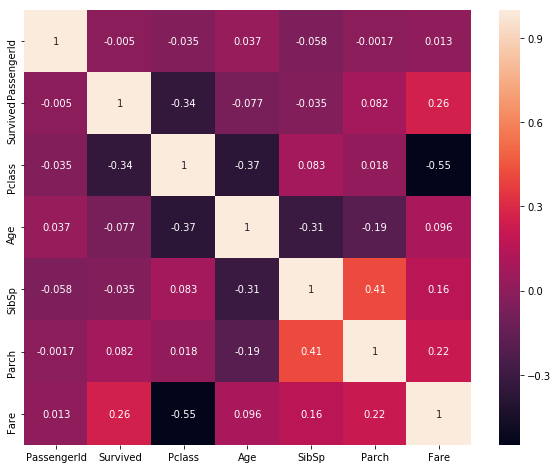

In [21]:
# Let's see the correlation matrix 
plt.figure(figsize = (10,8))        

# Size of the figure
sns.heatmap(train.corr(),annot = True)
plt.show()

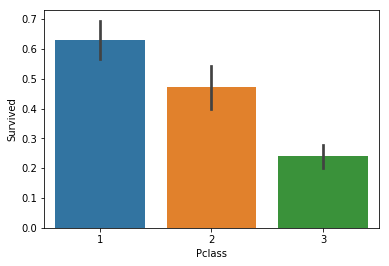

In [22]:
# We will visualize various features to understand their relations.

sns.barplot(x="Pclass", y="Survived", data=train)

In [23]:
# Percentage of Pclass = 1 who survived

train["Survived"][train["Pclass"] == 1].value_counts(normalize = True)[1]*100

62.96296296296296

In [24]:
print(pd.isnull(train).sum()) 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64


In [25]:
train = train.fillna({"Embarked": "S"})

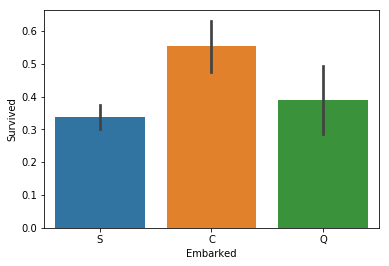

In [26]:
sns.barplot(x="Embarked", y="Survived", data=train)

In [27]:
# Percentage of Embarked = C who survived

train["Survived"][train["Embarked"] == 'C'].value_counts(normalize = True)[1]*100

55.35714285714286

In [28]:
#Percentage of females who survived

train["Survived"][train["Sex"] == 'female'].value_counts(normalize = True)[1]*100

74.20382165605095

In [29]:
#Percentage of males who survived

train["Survived"][train["Sex"] == 'male'].value_counts(normalize = True)[1]*100

18.890814558058924

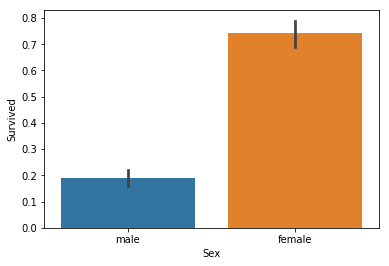

In [30]:
sns.barplot(x="Sex", y="Survived", data=train)

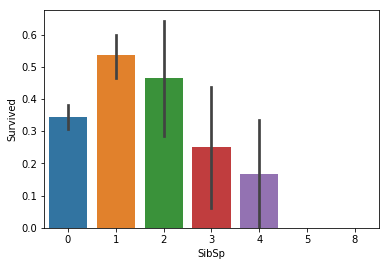

In [31]:
sns.barplot(x="SibSp", y="Survived", data=train)

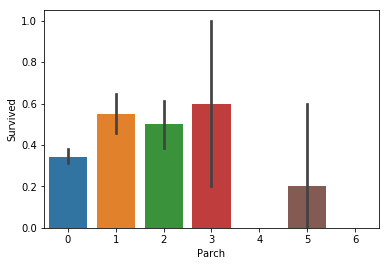

In [32]:
sns.barplot(x="Parch", y="Survived", data=train)


The Age feature is missing approximately 20% of its values. 
We will fill the missing age with the value (29.69) which is the mean age. 

In [33]:
train["Age"] = train["Age"].fillna(29.69)
test["Age"] = test["Age"].fillna(29.69)

train["Age_Group"] = pd.cut(train.Age,[-1, 5, 12, 18, 35, 60, np.inf], labels=['Baby', 'Child', 'Teenager', 'Youngster', 'Adult', 'Senior Citizen'])
test["Age_Group"] = pd.cut(test.Age,[-1, 5, 12, 18, 35, 60, np.inf], labels=['Baby', 'Child', 'Teenager', 'Youngster', 'Adult', 'Senior Citizen'])


In [34]:
round(100*(train.isnull().sum())/len(train.index))

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Fare           0.0
Embarked       0.0
Age_Group      0.0
dtype: float64

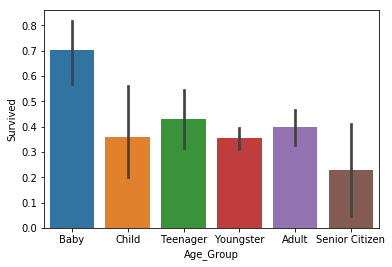

In [35]:
sns.barplot(x="Age_Group", y="Survived", data=train)

We can see in the description of the dataset that maximum fare is 512.32. Hence we will cut & lable the fare based on that. 
One Value in fare column in test dataset is nan. We will fill it with the mean fare value i.e. 32.20

In [36]:
test["Fare"] = test["Fare"].fillna(32.20)

train["Fare_Range"] = pd.cut(train.Fare,[-1, 130, 260, 390, 520], labels=['1', '2', '3', '4'])
test["Fare_Range"] = pd.cut(test.Fare,[-1, 130, 260, 390, 520], labels=['1', '2', '3', '4'])

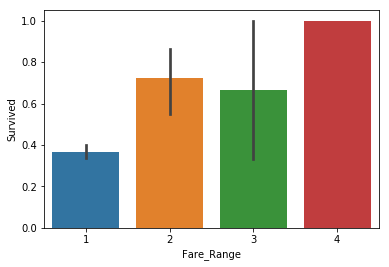

In [37]:
sns.barplot(x="Fare_Range", y="Survived", data=train)

People which high fare tickets are more likely to survive

We will drop the original Fare & Age column, since they are not required. We will also drop the Name Column since that is not required either. 

We will now map the Sex, Embarked & Age_Group column to numerical value

In [39]:
#We will map Sex, Embarked & Age_Group to numerical value

age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 'Youngster': 4, 'Adult': 5, 'Senior Citizen': 6}
train['Age_Group'] = train['Age_Group'].map(age_mapping)
test['Age_Group'] = test['Age_Group'].map(age_mapping)

In [40]:
sex_mapping = {"male": 0, "female": 1}
train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)

In [41]:
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
test['Embarked'] = test['Embarked'].map(embarked_mapping)
train['Embarked'] = train['Embarked'].map(embarked_mapping)


In [42]:
Fare_Range_mapping = {"1": 1, "2": 2, "3": 3, "4": 4}
test['Fare_Range'] = test['Fare_Range'].map(Fare_Range_mapping)
train['Fare_Range'] = train['Fare_Range'].map(Fare_Range_mapping)

train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,Age_Group,Fare_Range
0,1,0,3,0,1,0,1,4,1
1,2,1,1,1,1,0,2,5,1
2,3,1,3,1,0,0,1,4,1
3,4,1,1,1,1,0,1,4,1
4,5,0,3,0,0,0,1,4,1


In [43]:
test.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,Age_Group,Fare_Range
0,892,3,0,0,0,3,4,1
1,893,3,1,1,0,1,5,1
2,894,2,0,0,0,3,6,1
3,895,3,0,0,0,1,4,1
4,896,3,1,1,1,1,4,1


In [44]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
SibSp          418 non-null int64
Parch          418 non-null int64
Embarked       418 non-null int64
Age_Group      418 non-null int64
Fare_Range     418 non-null int64
dtypes: int64(8)
memory usage: 26.2 KB


In [45]:
# Logistic Regression


from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
columns = ['Pclass', 'Sex', 'SibSp','Embarked', 'Age_Group', 'Fare_Range']

from sklearn.model_selection import train_test_split

test_df = test
X = train[columns]
y = train["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20,random_state=0)

from sklearn.metrics import accuracy_score
lr.fit(X_train,y_train)
predictions = lr.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(accuracy)

0.8100558659217877


In [46]:
# Cross validation

from sklearn.model_selection import cross_val_score

lr = LogisticRegression()
scores = cross_val_score(lr, X, y, cv=10)
accuracy = np.mean(scores)
print(scores)
print(accuracy)

[0.82222222 0.77777778 0.78651685 0.86516854 0.80898876 0.7752809
 0.79775281 0.79775281 0.84269663 0.82954545]
0.8103702757916242


In [54]:
# final model

columns = ['Pclass', 'Sex', 'SibSp','Embarked', 'Age_Group', 'Fare_Range']
lr = LogisticRegression()
lr.fit(X,y)
test_df_predictions = lr.predict(test_df[columns])

In [50]:
# Create a Submission dataframe


test_df_ids = test_df["PassengerId"]
submission_df = {"PassengerId": test_df_ids,
                 "Survived": test_df_predictions}
submission = pd.DataFrame(submission_df)
#submission.head()

In [51]:
# Create a submission file for Kaggle
submission.to_csv("submission.csv",index=False)